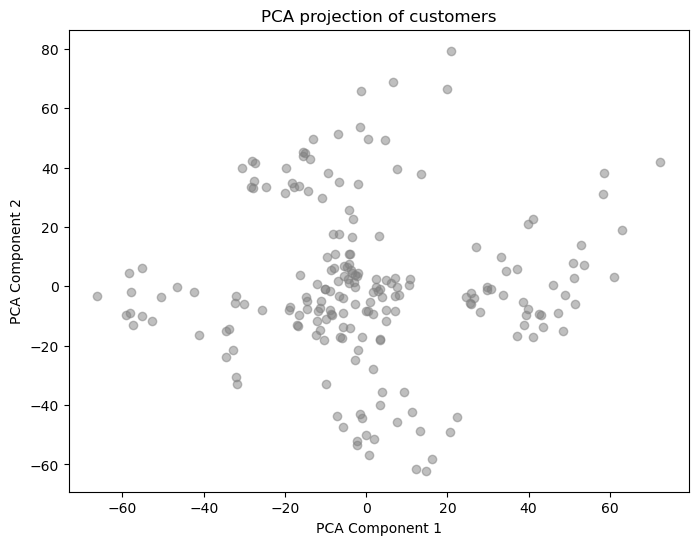

C:\Users\G.MUKESH SAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


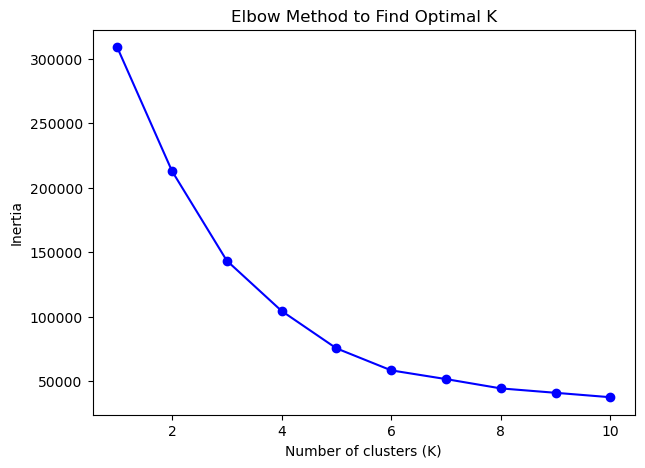

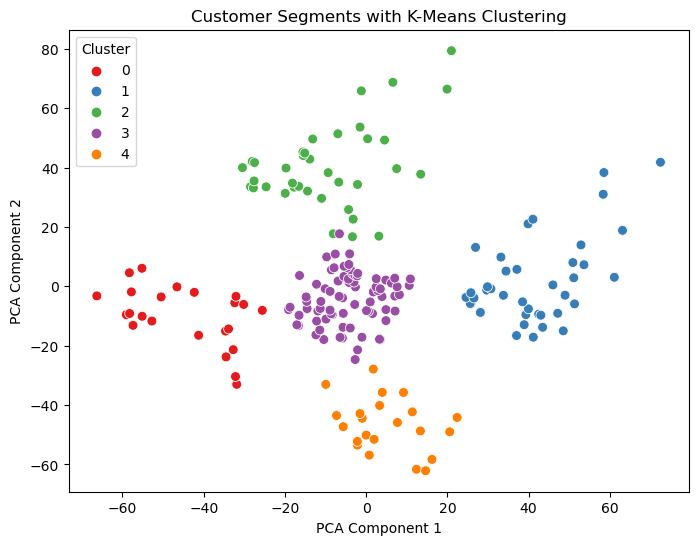

Silhouette Score for K=5: 0.444
Cluster centers (in feature space):
     Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  0.391304  45.217391           26.304348               20.913043
1  0.461538  32.692308           86.538462               82.128205
2  0.513514  40.324324           87.432432               18.189189
3  0.417722  43.126582           54.822785               49.835443
4  0.409091  25.272727           25.727273               79.363636


In [5]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Set before any heavy imports to avoid MKL/KMeans warning on Windows

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Encode categorical variable 'Gender' (Female=0, Male=1)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Select relevant features for clustering
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# PCA for visualization in 2D space (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c='grey')
plt.title('PCA projection of customers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Use the Elbow Method to determine optimal number of clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia, 'bo-')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

# From the elbow plot, choose optimal K (e.g., 5)
optimal_K = 5
kmeans = KMeans(n_clusters=optimal_K, random_state=42)
labels = kmeans.fit_predict(X)
df['Cluster'] = labels

# Visualize clusters in PCA space with color coding
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1', s=50)
plt.title('Customer Segments with K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Evaluate clustering using Silhouette Score
sil_score = silhouette_score(X, labels)
print(f'Silhouette Score for K={optimal_K}: {sil_score:.3f}')

# Print cluster centers for interpretation
print("Cluster centers (in feature space):")
print(pd.DataFrame(kmeans.cluster_centers_, columns=features))

# Save the dataset with cluster labels to CSV
df.to_csv('Mall_Customers_with_Clusters.csv', index=False)
